## 2019 Kenya Population and Census Results. Visualisation of the initial summary data.

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
df = pd.read_excel('census.xlsx')

### 1. Distribution of Population by Sex and County:

In [26]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Distribution of Population by County,NaN,NaN,NaN,NaN,NaN
1,Table 2. 2: Distribution of Population by Sex ...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Sex,NaN,NaN
3,National/ County,NaN,NaN,NaN,NaN,Total
4,NaN,Male,Female,Intersex,NaN,NaN


In [28]:
# renaming columns
df.columns = ['County', 'Male', 'Female', 'Intersex', 'Total', 'NaN']

In [30]:
df.head()

,County,Male,Female,Intersex,Total,NaN
0,Distribution of Population by County,NaN,NaN,NaN,NaN,NaN
1,Table 2. 2: Distribution of Population by Sex ...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Sex,NaN,NaN
3,National/ County,NaN,NaN,NaN,NaN,Total
4,NaN,Male,Female,Intersex,NaN,NaN


In [31]:
# delete column called NaN
df = df.drop(columns='NaN')  

In [32]:
# delete first 6 rows
df = df.drop([0,1,2,3,4,5,6], axis=0) 
# df = df.iloc[6:,]  this will also delete first 6 rows

In [33]:
df.head()

,County,Male,Female,Intersex,Total
7,Mom bas a…………..…,610257,598046,30,1208333.0
8,Kwale……………..……,425121,441681,18,866820.0
9,Kilifi………………..……,704089,749673,25,1453787.0
10,Tana River………….…,158550,157391,2,315943.0
11,Lamu……………….….,76103,67813,4,143920.0


In [34]:
# rename columns elements
df['County'] = df['County'].replace({'Mom bas a…………..…': 'Mombasa', 'Kwale……………..……': 'Kwale', 
                                     'Kilifi………………..……': 'Kilifi', 'Tana River………….…': 'Tana River', 
                                    'Lamu……………….….': 'Lamu', 'Taita/Taveta……..….…':'Taita/Taveta',
                                     'Garissa………………..':'Garissa', 'Wajir……………….……':'Wajir',
                                     'Mandera…………': 'Mandera', 'Mars abit…….…': 'Marsabit', 'Is iolo……….…….……':'Isiolo',
                                    'Meru……………………': 'Meru', 'Tharaka-Nithi…………': 'Tharaka-Nithi',
                                    'Embu………………….': 'Embu', 'Kitui……………………': 'Kitui', 'Machakos ………….….': 'Machakos',
                                    'Makueni……………….': 'Makueni', 'Nyandarua……………': 'Nyandarua',
                                    'Nyeri……………………': 'Nyeri', 'Kirinyaga………………': 'Kirinyaga', "Murang'a………………": "Murang'a",
                                    'Kiambu………………..': 'Kiambu', 'Turkana……………….': 'Turkana', 'West Pokot……………': 'West Pokot',
                                    'Samburu………………': 'Samburu', 'Trans Nzoia…………..': 'Trans Nzoia',
                                    'Uasin Gishu………….': 'Uasin Gishu', 'Elgeyo/Marakwet……..':'Elgeyo/Marakwet',
                                    'Nandi………………….': 'Nandi', 'Baringo………………..': 'Baringo', 'Laikipia…………………': 'Laikipia',
                                    'Nakuru…………………': 'Nakuru', 'Narok…………………': 'Narok', 'Kajiado…………………': 'Kajiado', 'Kericho………..………': 'Kericho',
                                    'Bomet…………………': 'Bomet', 'Kakamega……………':'Kakamega', 'Vihiga………………….': 'Vihiga',
                                    'Bungoma…………..…': 'Bungoma', 'Busia…………...……..': 'Busia', 'Siaya…………….…….': 'Siaya',
                                    'Kisumu………………..': 'Kisumu', 'Homa Bay…………….': 'Homa Bay', 'Migori………………….': 'Migori',
                                    'Kisii……………………': 'Kisii','Nyam ira……………….': 'Nyamira', 'Nairobi City……..…….': 'Nairobi City',})

In [35]:
df.head()

,County,Male,Female,Intersex,Total
7,Mombasa,610257,598046,30,1208333.0
8,Kwale,425121,441681,18,866820.0
9,Kilifi,704089,749673,25,1453787.0
10,Tana River,158550,157391,2,315943.0
11,Lamu,76103,67813,4,143920.0


In [36]:
# change float elements of a column into integers
df['Total'] = df['Total'].astype(int) 
df['Male'] = df['Male'].astype(int)
df['Female'] = df['Female'].astype(int)
df['Intersex'] = df['Intersex'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 7 to 53
Data columns (total 5 columns):
County      47 non-null object
Male        47 non-null int32
Female      47 non-null int32
Intersex    47 non-null int32
Total       47 non-null int32
dtypes: int32(4), object(1)
memory usage: 1.5+ KB


In [38]:
# get a percentage of male population and add its column
df["Percentage of Male"] = df["Male"].div(df["Total"]/100)

In [39]:
df.head()

,County,Male,Female,Intersex,Total,Percentage of Male
7,Mombasa,610257,598046,30,1208333,50.504042
8,Kwale,425121,441681,18,866820,49.043746
9,Kilifi,704089,749673,25,1453787,48.431373
10,Tana River,158550,157391,2,315943,50.183103
11,Lamu,76103,67813,4,143920,52.878683


In [40]:
# round off the percentages to one decimal place
df['Percentage of Male'] = df['Percentage of Male'].apply(lambda x: round(x, 1) if type(x) is float else x)

In [41]:
df.head()

,County,Male,Female,Intersex,Total,Percentage of Male
7,Mombasa,610257,598046,30,1208333,50.5
8,Kwale,425121,441681,18,866820,49.0
9,Kilifi,704089,749673,25,1453787,48.4
10,Tana River,158550,157391,2,315943,50.2
11,Lamu,76103,67813,4,143920,52.9


In [42]:
df.describe()

,Male,Female,Intersex,Total,Percentage of Male
count,4.700000e+01,4.700000e+01,47.000000,4.700000e+01,47.000000
mean,5.010225e+05,5.109514e+05,32.425532,1.014134e+06,49.668085
std,3.423677e+05,3.513158e+05,38.490961,6.935361e+05,1.653863
min,7.610300e+04,6.781300e+04,2.000000,1.439200e+05,45.300000
25%,3.031095e+05,3.112910e+05,18.000000,6.095050e+05,48.550000
50%,4.507410e+05,4.488680e+05,25.000000,8.936810e+05,49.700000
75%,5.699920e+05,5.897590e+05,34.000000,1.157256e+06,50.050000
max,2.192452e+06,2.204376e+06,245.000000,4.397073e+06,54.600000


In [43]:
# save a copy of the cleaned up csv file
df.to_csv('CensusCleaned.csv')

In [45]:
# get mean of the percentage of male population which I'll use in plotting
df['Percentage of Male'].mean()

49.66808510638298

#### 2. How do male and female numbers rank per county?

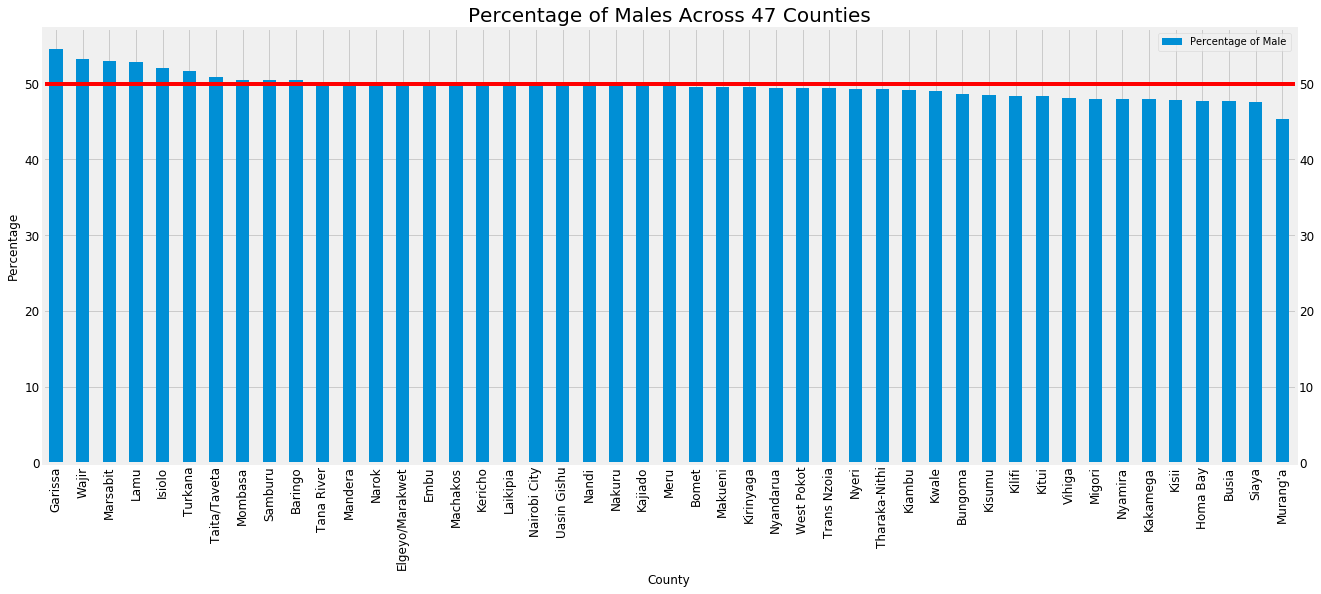

In [49]:
# plot percentage of male population with an line on y-axis to mark the average
df.groupby('County')['Percentage of Male'].sum().sort_values(ascending = False).plot(kind='bar', width=0.5, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.title('Percentage of Males Across 47 Counties', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)
plt.axhline(y=50, color='r', linestyle='-')
plt.legend()
plt.show()

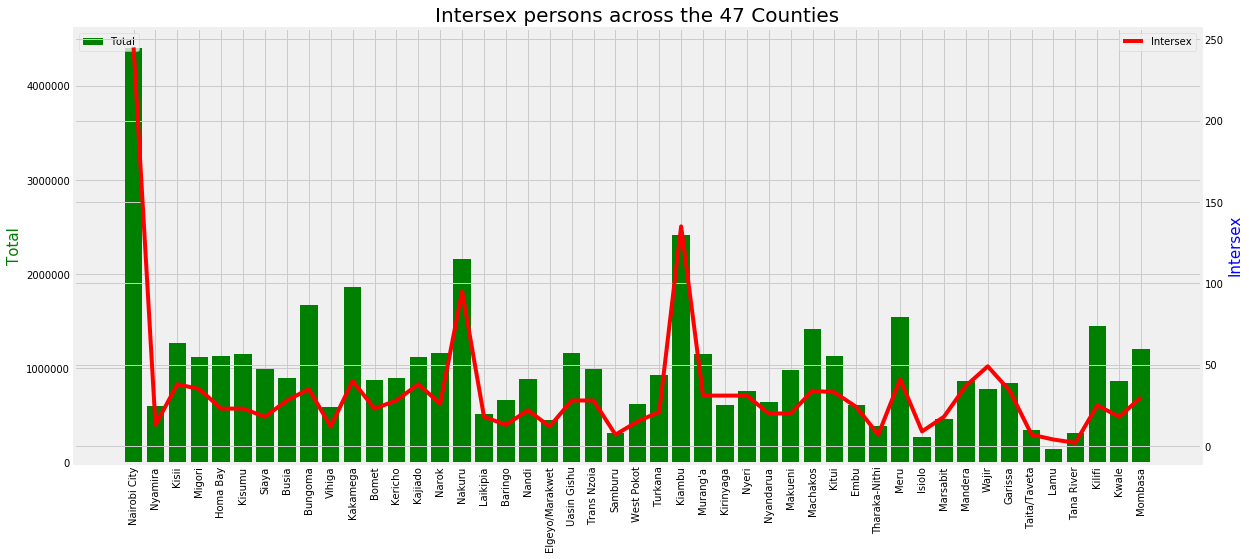

In [70]:
fig, ax = plt.subplots(figsize=(18,8))
ax2 = ax.twinx()
ax.bar(df['County'], df["Total"], color='g', label='Total', width=0.8)
ax2.plot(df['County'], df["Intersex"], color='r', label='Intersex')
ax.set_xticklabels(df['County'], rotation=90)
ax.legend(loc=2)
plt.title('Intersex persons across the 47 Counties', fontsize = 20)
plt.gca().invert_xaxis()
#plt.tick_params(labelsize=12, labelright=True)
ax.set_ylabel('Total', color='g', fontsize = 15)
ax2.set_ylabel('Intersex', color='b', fontsize = 15)
plt.legend()
plt.show()

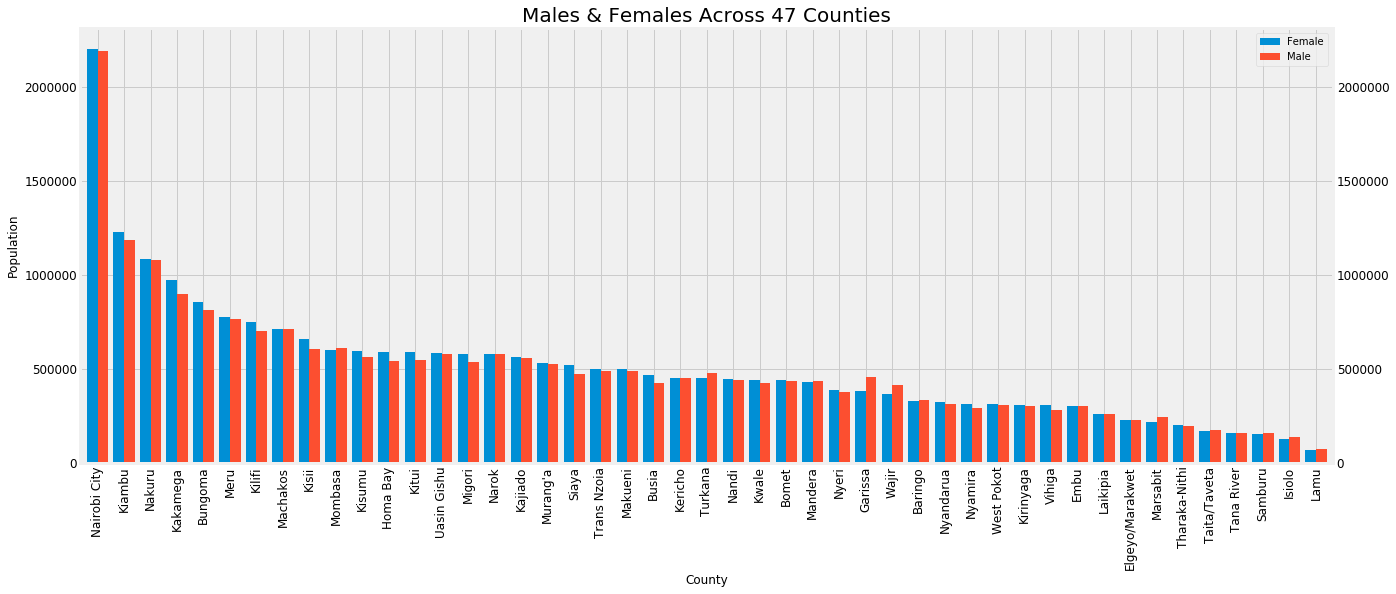

In [71]:
df.sort_values('Female', inplace=True, ascending = False)
df.plot(x = 'County', y = ['Female', 'Male'], kind = 'bar', width=0.8, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('Population', fontsize = 12)
plt.title('Males & Females Across 47 Counties', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)
#plt.axhline(y=500000, color='b', linestyle='-')
plt.legend()
plt.show()

### 2. Distribution of Population, Number of Households and Average Household Size by County.
#### How do counties rank in terms of number of households and average household size?

In [76]:
household = pd.read_excel('household.xlsx')

In [251]:
# I cleaned up the data on excel first before loading it to Jupyter to go straight to exploratory analysis
household.head()

,County,Population,No. of Households,Ave. Household size,Population.,Ave Household size
46,Nairobi City,4337080,1506888,2.9,100.000000,42.028986
21,Kiambu,2402834,795241,3.0,55.402114,43.478261
31,Nakuru,2142667,616046,3.5,49.403447,50.724638
36,Kakamega,1861332,433207,4.3,42.916709,62.318841
38,Bungoma,1663898,358796,4.6,38.364476,66.666667


In [80]:
household.describe()

,Population,No. of Households,Ave. Household size
count,4.700000e+01,4.700000e+01,47.000000
mean,1.004538e+06,2.605088e+05,4.231915
std,6.855041e+05,2.349423e+05,0.884186
min,1.419090e+05,3.796300e+04,2.900000
25%,6.051995e+05,1.419560e+05,3.500000
50%,8.868560e+05,2.041880e+05,4.300000
75%,1.147078e+06,3.064985e+05,4.650000
max,4.337080e+06,1.506888e+06,6.900000


In [81]:
household['No. of Households'].mean()

260508.78723404257

In [132]:
household['Ave. Household size'].mean()

4.231914893617021

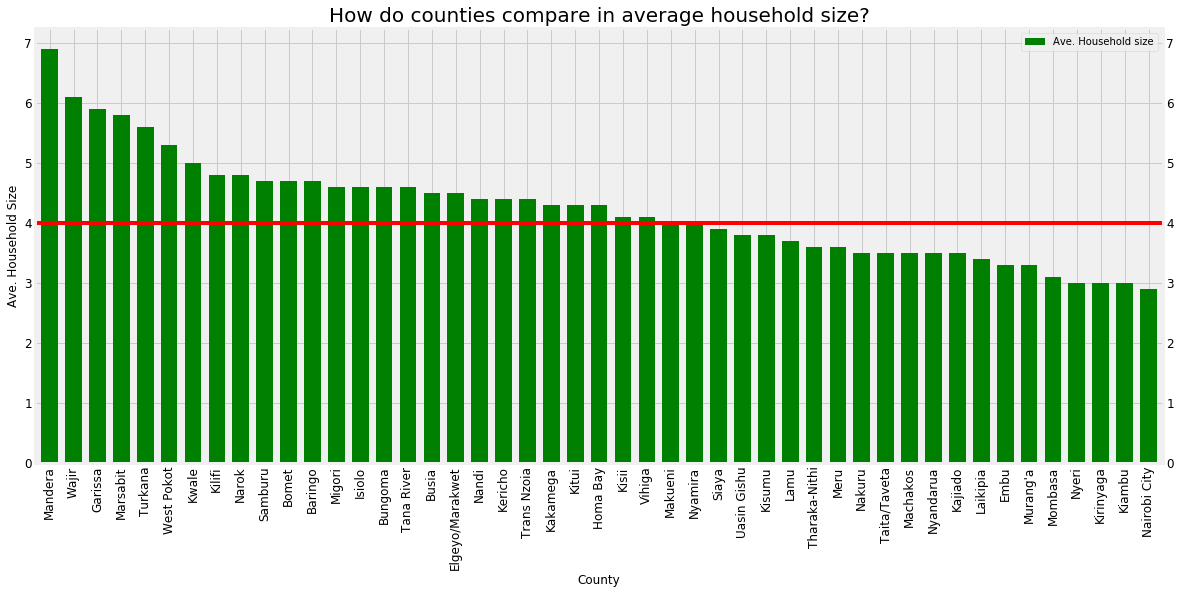

In [256]:
household.sort_values('Ave. Household size', inplace=True, ascending = False)
household.plot(x = 'County', y = ['Ave. Household size'], kind = 'bar', width=0.7, color='g', figsize=(18, 8))
plt.xlabel('County', fontsize = 12)
#plt.gca().invert_xaxis()
plt.ylabel('Ave. Household Size', fontsize = 12)
plt.title('How do counties compare in average household size?', fontsize = 20)
plt.axhline(y=4, color='r', linestyle='-')
plt.tick_params(labelsize=12, labelright=True)

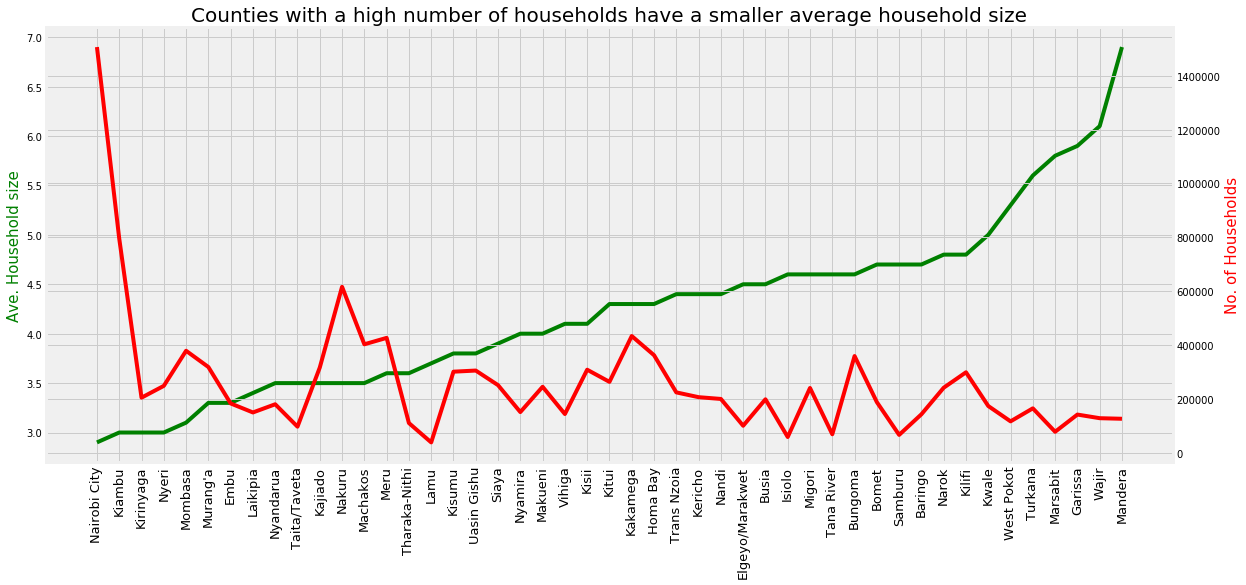

In [258]:
fig, ax = plt.subplots(figsize=(18,8))
ax2 = ax.twinx()
household.sort_values('Ave. Household size', inplace=True, ascending = False)
ax.plot(household['County'], household["Ave. Household size"], color='g', label='Ave. Household size')
ax2.plot(household['County'], household["No. of Households"], color='r')
ax.set_xticklabels(household['County'], rotation=90, fontsize = 13)
#ax.legend(loc='1')
plt.title('Counties with a high number of households have a smaller average household size', fontsize = 20)
ax.set_ylabel('Ave. Household size', color='g', fontsize = 15)
ax2.set_ylabel('No. of Households', color='r', fontsize = 15)
plt.gca().invert_xaxis()

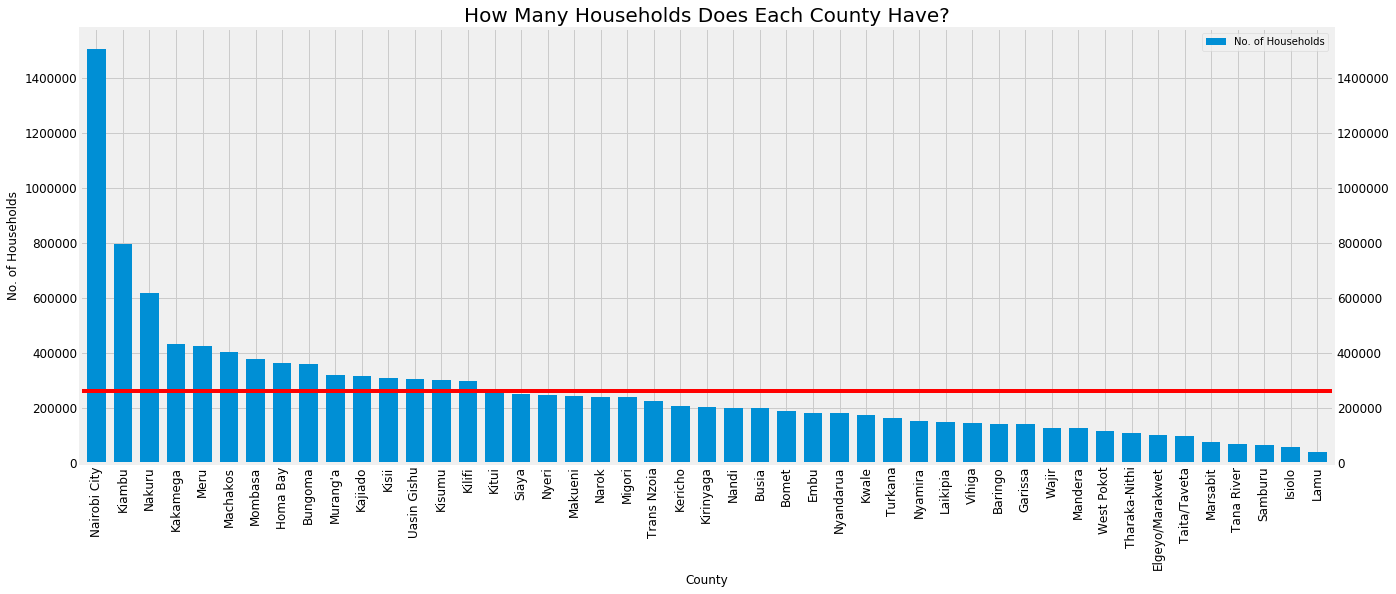

In [262]:
household.sort_values('No. of Households', inplace=True, ascending = False)
household.plot(x = 'County', y = ['No. of Households'], kind = 'bar', width=0.7, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('No. of Households', fontsize = 12)
plt.title('How Many Households Does Each County Have?', fontsize = 20)
plt.axhline(y=260508, color='r', linestyle='-')
plt.tick_params(labelsize=12, labelright=True)

In [139]:
household.head()

,County,Population,No. of Households,Ave. Household size
46,Nairobi City,4337080,1506888,2.9
21,Kiambu,2402834,795241,3.0
31,Nakuru,2142667,616046,3.5
36,Kakamega,1861332,433207,4.3
11,Meru,1535635,426360,3.6


In [140]:
# change No. of Household and Ave. Household size to percentages for easier plotting on the same y axis
household["Population."] = household["Population"] / household['Population'].max()*100
household["Ave Household size"] = household["Ave. Household size"] / household['Ave. Household size'].max()*100

In [141]:
household.head()

,County,Population,No. of Households,Ave. Household size,Population.,Ave Household size
46,Nairobi City,4337080,1506888,2.9,100.000000,42.028986
21,Kiambu,2402834,795241,3.0,55.402114,43.478261
31,Nakuru,2142667,616046,3.5,49.403447,50.724638
36,Kakamega,1861332,433207,4.3,42.916709,62.318841
11,Meru,1535635,426360,3.6,35.407117,52.173913


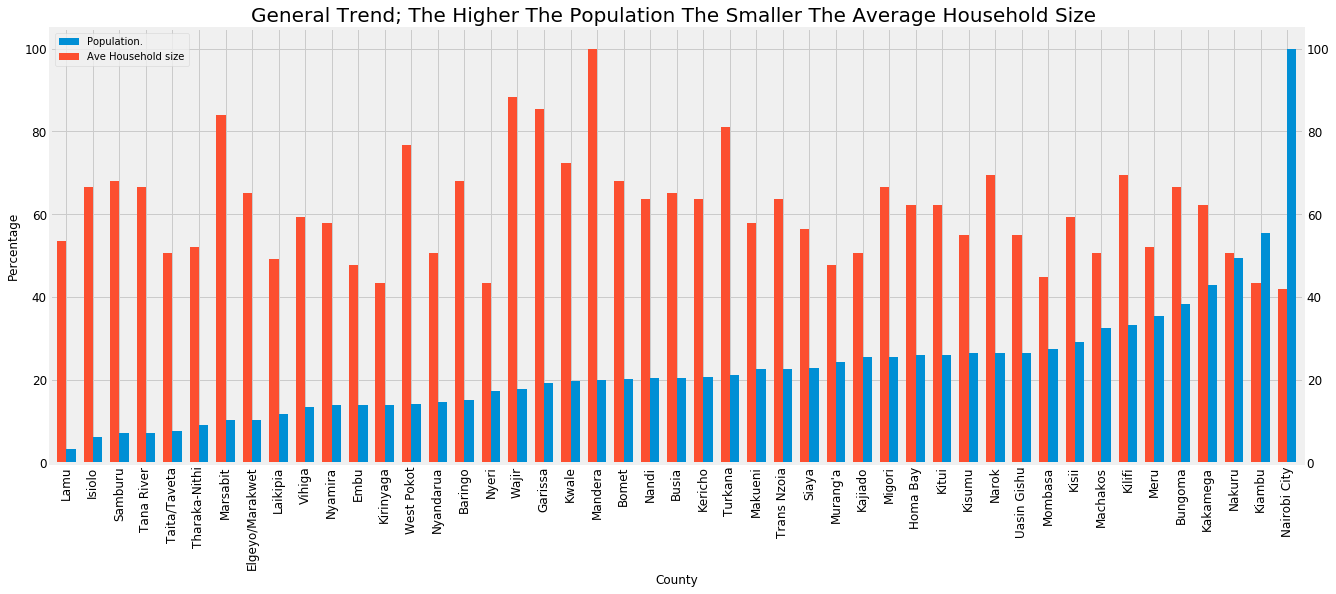

In [263]:
# plotting population and average household size in the same graph
household.sort_values('Population.', inplace=True, ascending = False)
household.plot(x = 'County', y = ['Population.', 'Ave Household size'], kind = 'bar', width=0.7, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.gca().invert_xaxis()
plt.title('General Trend; The Higher The Population The Smaller The Average Household Size ', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)

### 3.Distribution of Population, Land Area and Population Density by County.
#### How do counties rank in terms of land area and population density?

In [229]:
density = pd.read_excel('density.xlsx')

In [230]:
density.describe()

,Population,Land Area (Sq. Km),Population Density
count,4.700000e+01,47.000000,47.000000
mean,1.012006e+06,12359.074468,509.148936
std,6.932427e+05,17366.002689,1175.429468
min,1.439200e+05,219.900000,6.000000
25%,6.095050e+05,2530.350000,52.500000
50%,8.936810e+05,3325.000000,221.000000
75%,1.156724e+06,14845.850000,416.000000
max,4.397073e+06,70944.100000,6247.000000


In [231]:
density.head()

,County,Population,Land Area (Sq. Km),Population Density
0,Mombasa,1208333,219.9,5495
1,Kwale,866820,8267.1,105
2,Kilifi,1453787,12539.7,116
3,Tana River,315943,37950.5,8
4,Lamu,143920,6253.3,23


In [232]:
density['Land Area (Sq. Km)'].mean()

12359.074468085111

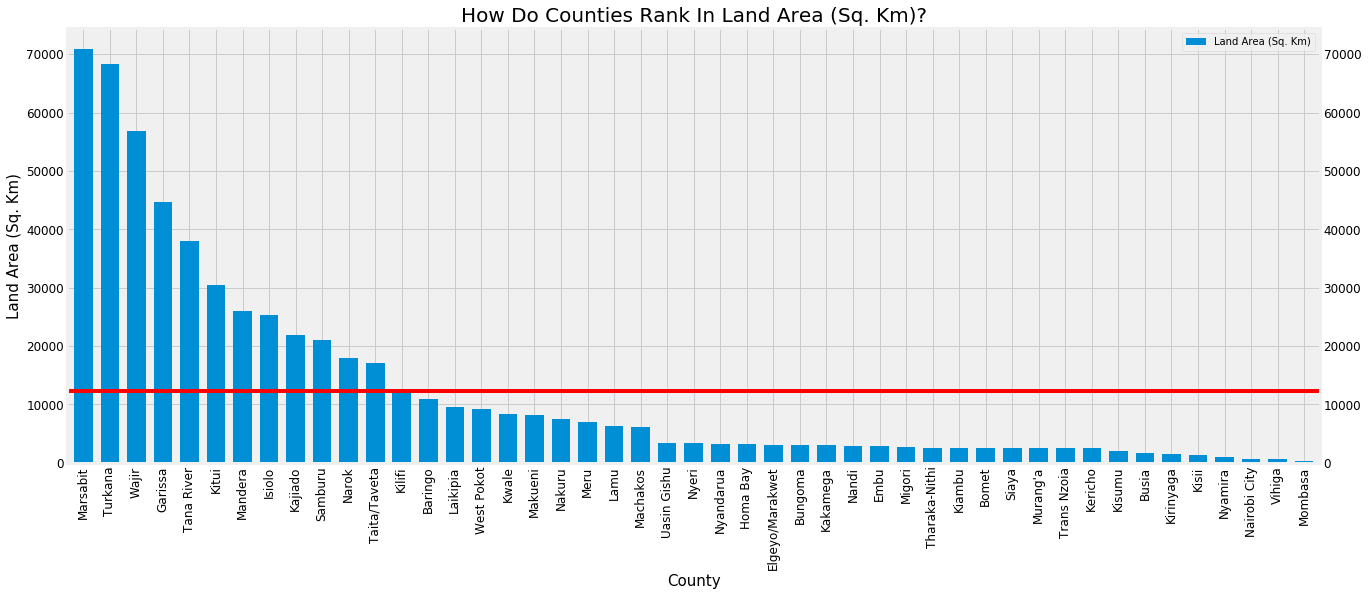

In [246]:
# plotting land area per county
density.sort_values('Land Area (Sq. Km)', inplace=True, ascending = True)
density.plot(x = 'County', y = ['Land Area (Sq. Km)'], kind = 'bar', width=0.7, figsize=(20, 8))
plt.ylim(-15) # I lowered the y limit to -15 from 0 to allow visualisation of bars representing very small figures
plt.gca().invert_xaxis()
plt.xlabel('County', fontsize = 15)
plt.ylabel('Land Area (Sq. Km)', fontsize = 15)
plt.title('How Do Counties Rank In Land Area (Sq. Km)?', fontsize = 20)
plt.axhline(y=12359, color='r', linestyle='-') # average land area (sq. km) of a county. Skewed by outliers.
plt.tick_params(labelsize=12, labelright=True)
plt.legend()
plt.show()

In [167]:
density['Population Density'].mean()

509.1489361702128

In [201]:
density['Population Density'].max()

6247

No handles with labels found to put in legend.


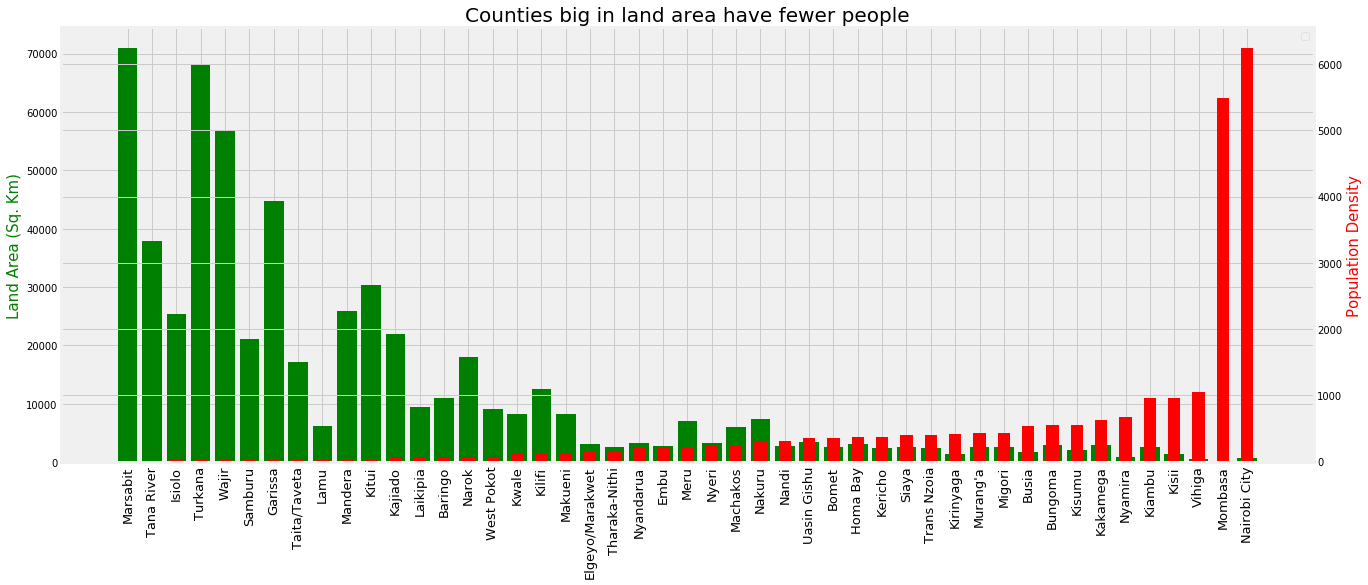

In [228]:
# plotting population density vs land area (sq km) in the same graph with different ranges of the 2 y-axes.
fig, ax = plt.subplots(figsize=(20,8))
ax2 = ax.twinx()
density.sort_values('Population Density', inplace=True, ascending = True)
ax.bar(density['County'], density["Land Area (Sq. Km)"], color='g')
ax2.bar(density['County'], density["Population Density"], color='r', width=0.5) #reduced bar-width to prevent overlap of bars
ax.set_xticklabels(density['County'], rotation=90, fontsize = 13)
plt.title('Counties big in land area have fewer people', fontsize = 20)
ax.set_ylabel('Land Area (Sq. Km)', color='g', fontsize = 15)
ax2.set_ylabel('Population Density', color='r', fontsize = 15)
plt.ylim(-15)
plt.legend()
plt.show()

In [237]:
density["Land Area"] = density["Land Area (Sq. Km)"] / density['Land Area (Sq. Km)'].max()*100
density["Population Density."] = density["Population Density"] / density['Population Density'].max()*100

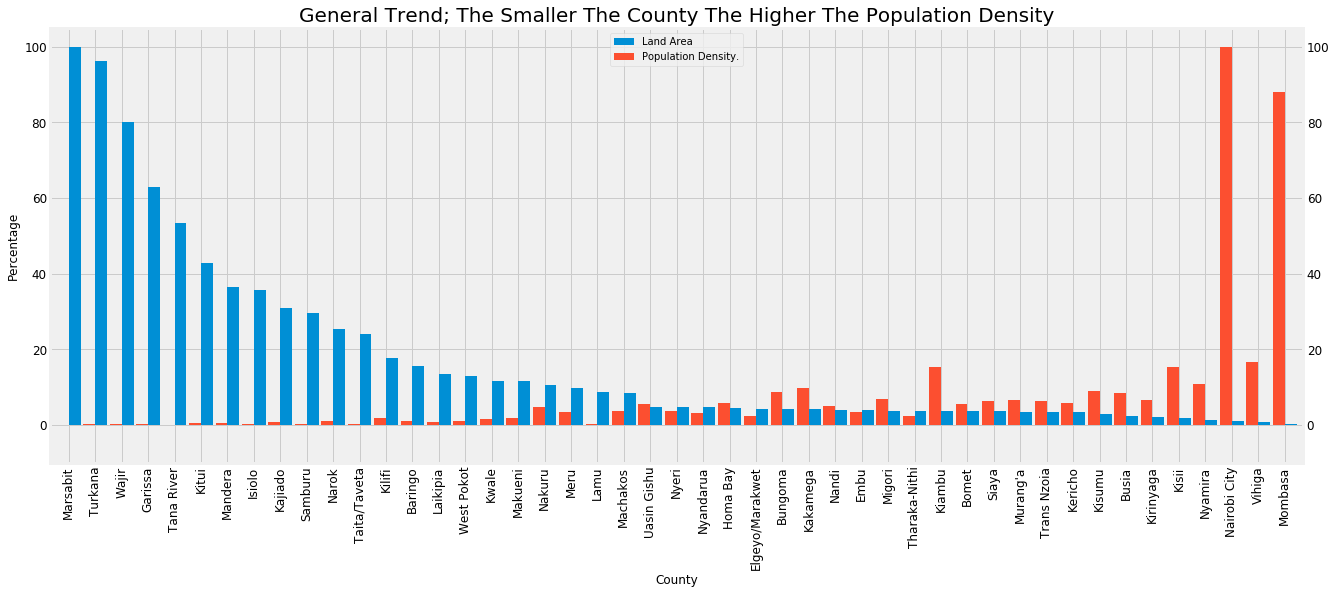

In [249]:
density.plot(x = 'County', y = ['Land Area', 'Population Density.'], kind = 'bar', width=0.9, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.gca().invert_xaxis() # this is to invert the 2 bars to start from left or right.
plt.ylim(-10)
plt.ylabel('Percentage', fontsize = 12)
plt.title('General Trend; The Smaller The County The Higher The Population Density', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)
plt.legend()
plt.show()

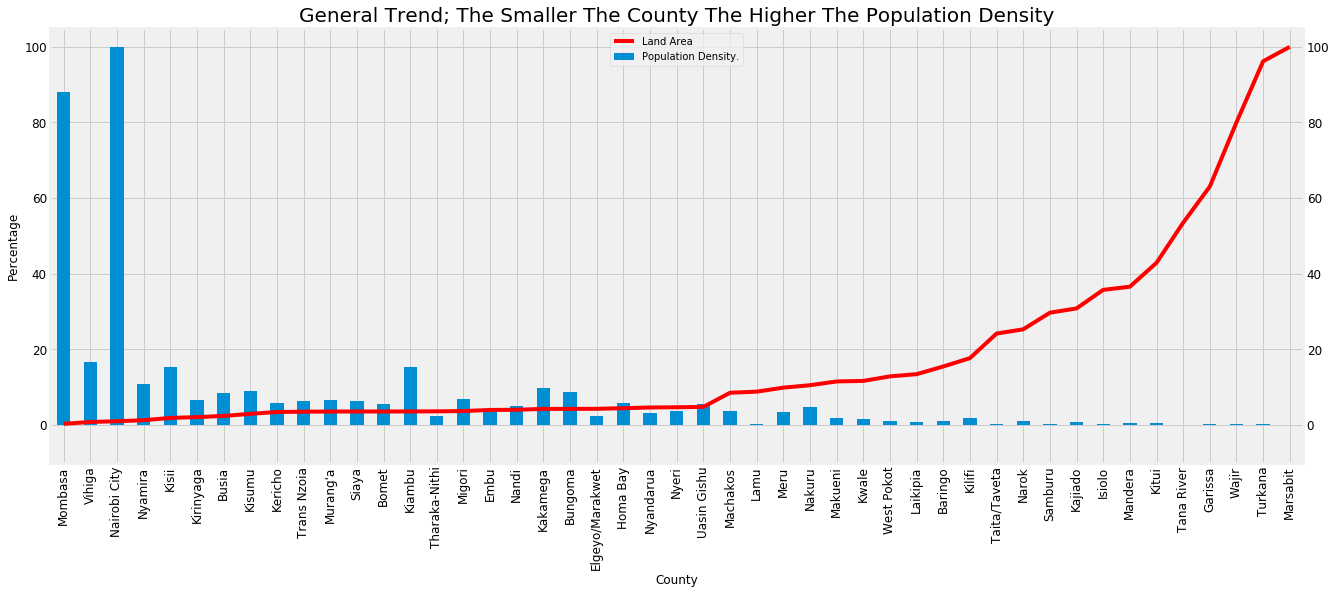

In [239]:
# Plotting a bar and line in the same graph
density.sort_values('Land Area', inplace=True, ascending = False)
ax = density.plot(x= 'County', y="Land Area", x_compat=True, color = 'r')  # plot lines first
density.plot(x='County', y="Population Density.", kind="bar", ax=ax, width=0.5, figsize=(20, 8)) # plot bars next
plt.xlabel('County', fontsize = 12)
plt.gca().invert_xaxis() # invert x axis to start from left or right
plt.ylim(-10)
plt.ylabel('Percentage', fontsize = 12)
plt.title('General Trend; The Smaller The County The Higher The Population Density', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)
plt.legend()
plt.show()